<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries



In [185]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Validate Data

In [172]:
df=pd.read_csv('student_exam_data.csv')
type(df)

pandas.core.frame.DataFrame

In [173]:
df.shape

(500, 3)

In [174]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


# Explore Data

In [176]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [192]:
# create bar plot to understand distribution of pass fail student in existing data assuming 1 stands for pass and 0 for fail
df['Pass/Fail'].value_counts()

Pass/Fail
0    316
1    184
Name: count, dtype: int64

Text(0, 0.5, 'counts')

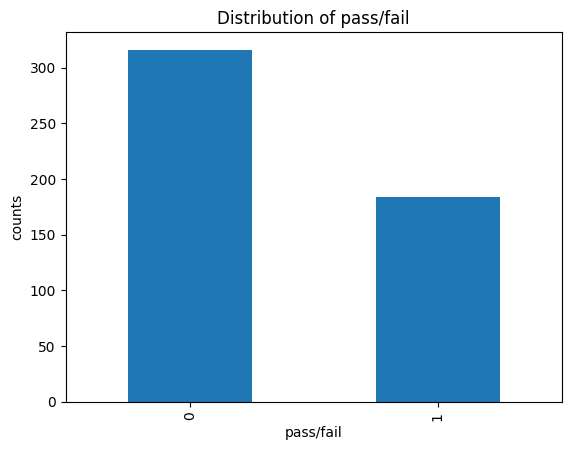

In [194]:
df['Pass/Fail'].value_counts().plot(kind='bar')
plt.title('Distribution of pass/fail')
plt.xlabel('pass/fail')
plt.ylabel('counts')

(array([45., 67., 54., 50., 46., 59., 45., 41., 49., 44.]),
 array([40.27792138, 46.24843528, 52.21894918, 58.18946309, 64.15997699,
        70.13049089, 76.10100479, 82.07151869, 88.04203259, 94.0125465 ,
        99.9830604 ]),
 <BarContainer object of 10 artists>)

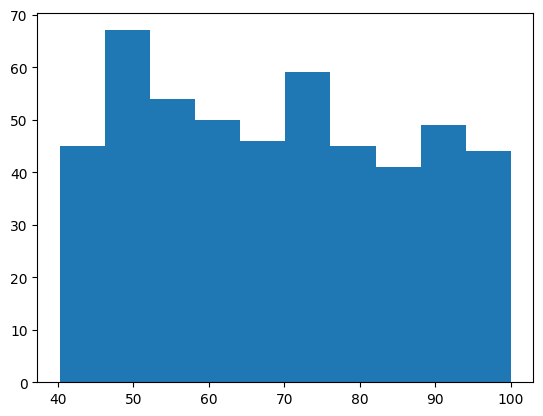

In [200]:
plt.hist(df['Previous Exam Score'])

# ML Modelling

## Target Variable and Features

In [177]:
X=df.drop(columns=['Pass/Fail'])
y=df['Pass/Fail']

## Train Test Split

In [178]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
X_train.head()

,Study Hours,Previous Exam Score
249,8.677085,77.454280
433,1.910104,71.541411
19,3.621062,49.025013
322,6.941776,60.009950
332,1.129541,48.451421


# Train the Model

In [180]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

# Predict from Model

In [181]:
y_pred=lr_model.predict(X_test)

# Validate Model

In [182]:
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [183]:
y_test[0:5]

361    1
73     1
374    0
155    0
104    0
Name: Pass/Fail, dtype: int64

# Performance Evaluation
## Accuracy

In [184]:
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.86
